In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Food_Delivery_Times.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [5]:
df.describe(include="object")

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,970,970,970,1000
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,470,390,308,503


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [8]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [9]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


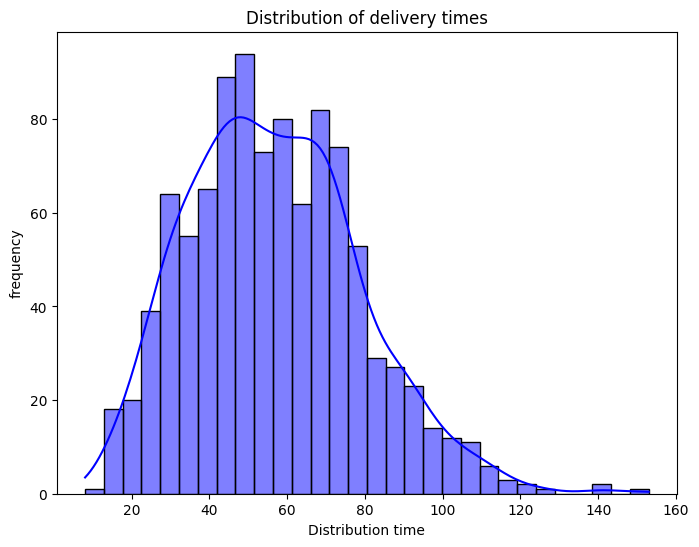

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Delivery_Time_min"],kde=True,color="blue",bins=30)
plt.title("Distribution of delivery times")
plt.xlabel("Distribution time")
plt.ylabel("frequency")
plt.show()

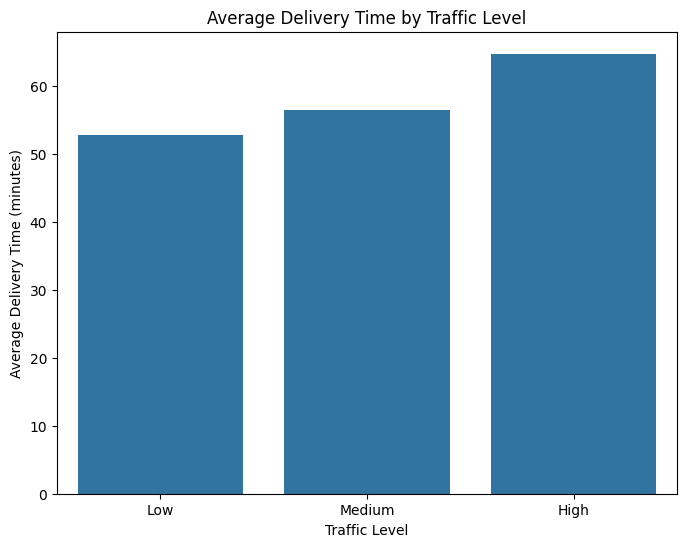

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df, errorbar=None)
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

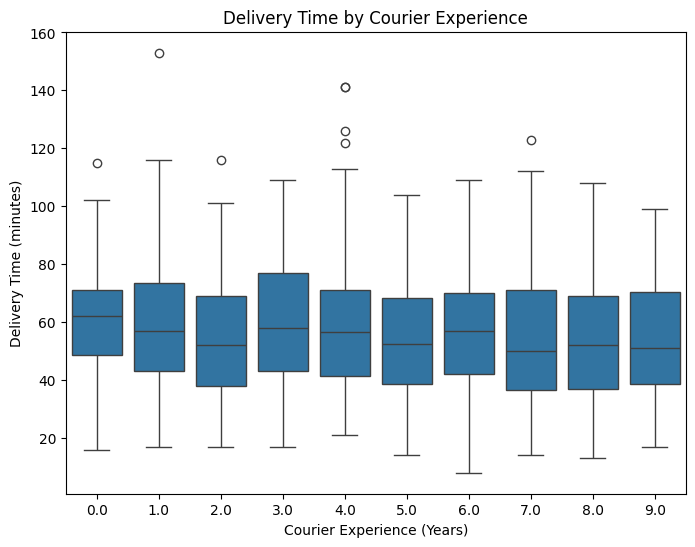

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df)
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (Years)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

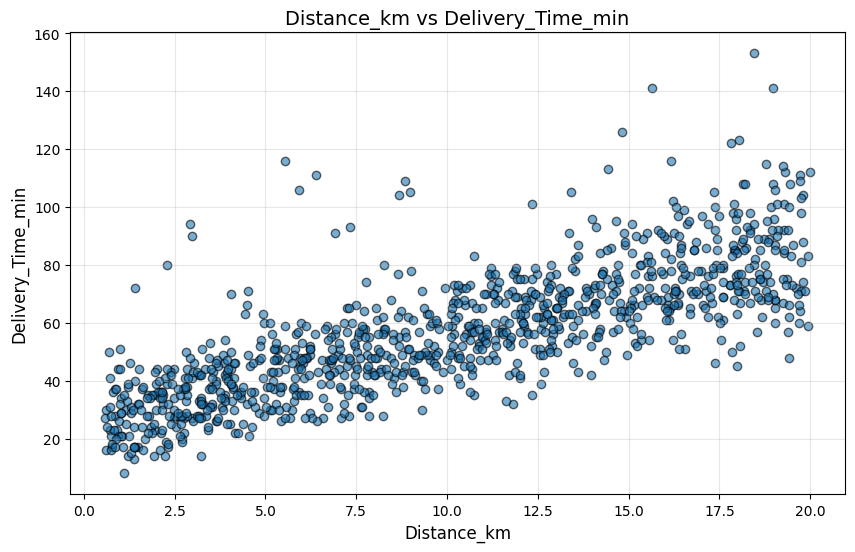

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Distance_km"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


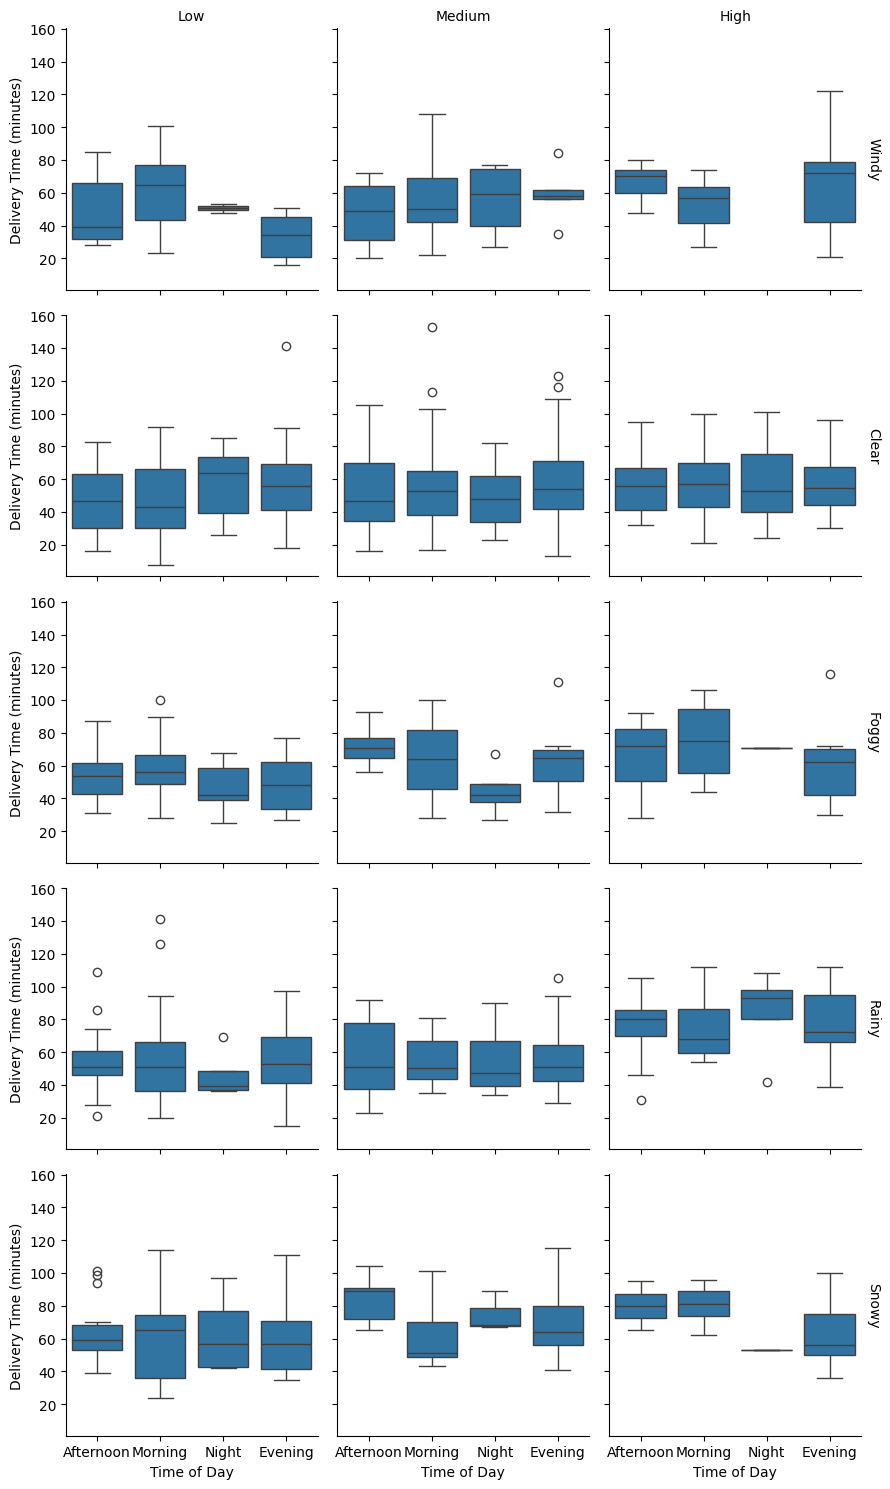

In [14]:
g = sns.FacetGrid(df, col='Traffic_Level', row='Weather', margin_titles=True)
g.map(sns.boxplot, 'Time_of_Day', 'Delivery_Time_min')
g.set_axis_labels('Time of Day', 'Delivery Time (minutes)')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show()

In [16]:
df.drop('Order_ID', axis=1, inplace=True)

In [17]:
x=df.drop(columns=['Delivery_Time_min'])
y=df['Delivery_Time_min']

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Weather'] = label_encoder.fit_transform(x['Weather'])
x['Traffic_Level'] = label_encoder.fit_transform(x['Traffic_Level'])
x['Time_of_Day'] = label_encoder.fit_transform(x['Time_of_Day'])
x['Vehicle_Type'] = label_encoder.fit_transform(x['Vehicle_Type'])

In [19]:
x.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,4,1,0,2,12,1.0
1,16.42,0,2,1,0,20,2.0
2,9.52,1,1,3,2,28,1.0
3,7.44,2,2,0,2,5,1.0
4,19.03,0,1,2,0,16,5.0


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

print("\nTrain shape:", x_train.shape, "Test shape:", x_test.shape)


Train shape: (800, 7) Test shape: (200, 7)


In [21]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

RF = RandomForestRegressor()
start_train = time.time()
RF.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(RF, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 3.0803625
MSE: 22.110578625000002
RMSE: 4.702188705804989
R2 Score: 0.9553973438266354

=== Test Set Evaluation ===
MAE: 7.1287
MSE: 103.144638
RMSE: 10.156014868047407
R2 Score: 0.7698830196464638

⏱️ Training time: 0.6969 seconds
⏱️ Prediction time: 0.0689 seconds


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

lr = LinearRegression()
start_train = time.time()
lr.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(lr, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 7.609014559340299
MSE: 137.71815715799667
RMSE: 11.735337965222675
R2 Score: 0.7221874779160147

=== Test Set Evaluation ===
MAE: 7.286671126937917
MSE: 109.21337330986829
RMSE: 10.450520241110883
R2 Score: 0.7563435950951674

⏱️ Training time: 0.0222 seconds
⏱️ Prediction time: 0.0028 seconds


In [24]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

svr = SVR()
start_train = time.time()
svr.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(svr, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 8.571666508483213
MSE: 165.69785931357856
RMSE: 12.872368053842251
R2 Score: 0.6657453080278186

=== Test Set Evaluation ===
MAE: 8.02988530800719
MSE: 129.08317496282453
RMSE: 11.361477675145277
R2 Score: 0.7120138185283817

⏱️ Training time: 0.0389 seconds
⏱️ Prediction time: 0.0611 seconds


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

xgboost = XGBRegressor()
start_train = time.time()
xgboost.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(xgboost, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 0.487486332654953
MSE: 0.5725728869438171
RMSE: 0.7566854610363656
R2 Score: 0.9988449811935425

=== Test Set Evaluation ===
MAE: 7.725086688995361
MSE: 112.80699157714844
RMSE: 10.621063580317578
R2 Score: 0.7483261823654175

⏱️ Training time: 1.8113 seconds
⏱️ Prediction time: 0.0910 seconds


In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ridge = Ridge()
start_train = time.time()
ridge.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(ridge, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 7.6112580804228696
MSE: 137.71871591537646
RMSE: 11.735361771814981
R2 Score: 0.7221863507603794

=== Test Set Evaluation ===
MAE: 7.2866281906336665
MSE: 109.19186383185821
RMSE: 10.449491080041085
R2 Score: 0.7563915830102412

⏱️ Training time: 0.0085 seconds
⏱️ Prediction time: 0.0064 seconds


In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lasso = Lasso()
start_train = time.time()
lasso.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(lasso, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 7.937028259270772
MSE: 143.0647512159183
RMSE: 11.960967821038492
R2 Score: 0.711402038940917

=== Test Set Evaluation ===
MAE: 7.515710029774316
MSE: 114.39748639092824
RMSE: 10.695676060489502
R2 Score: 0.7447777738255752

⏱️ Training time: 0.0056 seconds
⏱️ Prediction time: 0.0033 seconds


## Hyperparameter Tuning

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from math import sqrt
import time
import numpy as np

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search with Cross-Validation
RF = RandomForestRegressor(random_state=42)

start_train = time.time()
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=20,                  # Number of combinations to try
    cv=5,                       # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1                   # Use all CPU cores
)

random_search.fit(x_train, y_train)
end_train = time.time()

# Best model after tuning
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluation function
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluate the tuned model
evaluate_model(best_model, x_train, y_train, x_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

=== Train Set Evaluation ===
MAE: 5.027133216881113
MSE: 61.24930170328135
RMSE: 7.826193308581213
R2 Score: 0.8764445928320825

=== Test Set Evaluation ===
MAE: 7.249367379333128
MSE: 97.28638978793543
RMSE: 9.8633863245812
R2 Score: 0.7829528448439869

⏱️ Training time: 52.7843 seconds
⏱️ Prediction time: 0.1437 seconds


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import time

# Parameter grid untuk LinearRegression
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Model dasar
lr = LinearRegression()

# GridSearchCV untuk cari kombinasi terbaik
start_train = time.time()
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
end_train = time.time()

# Model terbaik
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fungsi evaluasi
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluasi model terbaik
evaluate_model(best_lr, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True, 'positive': False}

=== Train Set Evaluation ===
MAE: 7.609014559340299
MSE: 137.71815715799667
RMSE: 11.735337965222675
R2 Score: 0.7221874779160147

=== Test Set Evaluation ===
MAE: 7.286671126937917
MSE: 109.21337330986829
RMSE: 10.450520241110883
R2 Score: 0.7563435950951674

⏱️ Training time: 0.2945 seconds
⏱️ Prediction time: 0.0030 seconds


In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import time

# Hyperparameter grid untuk SVR
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Model dasar
svr = SVR()

# GridSearchCV untuk tuning
start_train = time.time()
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit model dengan pencarian grid
grid_search.fit(x_train, y_train)
end_train = time.time()

# Ambil model terbaik
best_svr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fungsi evaluasi
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluasi model terbaik
evaluate_model(best_svr, x_train, y_train, x_test, y_test)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

=== Train Set Evaluation ===
MAE: 6.213602843374396
MSE: 119.06865162711088
RMSE: 10.911858303108177
R2 Score: 0.7598082700764169

=== Test Set Evaluation ===
MAE: 6.600985237896473
MSE: 96.81510299335321
RMSE: 9.83946660105888
R2 Score: 0.7840042915905425

⏱️ Training time: 83.2688 seconds
⏱️ Prediction time: 0.0415 seconds


In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import time

# Parameter grid untuk tuning
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 1, 1.5]
}

# Model dasar
xgb = XGBRegressor(random_state=42, verbosity=0)

# Hyperparameter tuning dengan RandomizedSearchCV
start_train = time.time()
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)
end_train = time.time()

# Ambil model terbaik
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Fungsi evaluasi
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluasi model terbaik
evaluate_model(best_xgb, x_train, y_train, x_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}

=== Train Set Evaluation ===
MAE: 5.871665000915527
MSE: 86.67102813720703
RMSE: 9.30972760811008
R2 Score: 0.8251625299453735

=== Test Set Evaluation ===
MAE: 6.306199550628662
MSE: 81.9030990600586
RMSE: 9.050033097180286
R2 Score: 0.8172731399536133

⏱️ Training time: 17.9330 seconds
⏱️ Prediction time: 0.0102 seconds


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import time

# Parameter grid untuk Ridge Regression
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'saga', 'lsqr']
}

# Ridge Regression model dasar
ridge = Ridge()

# Hyperparameter tuning dengan GridSearchCV
start_train = time.time()
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
end_train = time.time()

# Ambil model terbaik
best_ridge = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fungsi evaluasi
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluasi model terbaik
evaluate_model(best_ridge, x_train, y_train, x_test, y_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'alpha': 1, 'fit_intercept': True, 'solver': 'auto'}

=== Train Set Evaluation ===
MAE: 7.6112580804228696
MSE: 137.71871591537646
RMSE: 11.735361771814981
R2 Score: 0.7221863507603794

=== Test Set Evaluation ===
MAE: 7.2866281906336665
MSE: 109.19186383185821
RMSE: 10.449491080041085
R2 Score: 0.7563915830102412

⏱️ Training time: 0.8305 seconds
⏱️ Prediction time: 0.0025 seconds


In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import time

# Parameter grid untuk tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

# Inisialisasi model dasar
lasso = Lasso(max_iter=10000)

# GridSearchCV untuk tuning hyperparameter
start_train = time.time()
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
end_train = time.time()

# Model terbaik dari tuning
best_lasso = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fungsi evaluasi model
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("\n=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# Evaluasi model terbaik
evaluate_model(best_lasso, x_train, y_train, x_test, y_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'alpha': 0.001, 'fit_intercept': True, 'selection': 'random'}

=== Train Set Evaluation ===
MAE: 7.60910653991453
MSE: 137.71816481758887
RMSE: 11.73533829156999
R2 Score: 0.7221874624646705

=== Test Set Evaluation ===
MAE: 7.286425247074114
MSE: 109.21090440644089
RMSE: 10.450402116973342
R2 Score: 0.756349103249663

⏱️ Training time: 0.9177 seconds
⏱️ Prediction time: 0.0042 seconds


In [37]:
import joblib

joblib.dump(ridge, "Delivery_Time_Prediction_Ridge1")

['Delivery_Time_Prediction_Ridge1']

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

# Load data
df = pd.read_csv("Food_Delivery_Times.csv")
df.drop('Order_ID', axis=1, inplace=True)

# Pisahkan fitur dan target
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

# Fitur numerik dan kategorikal
numeric_features = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
categorical_features = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline akhir
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train-test split (optional untuk validasi)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
model.fit(X_train, y_train)

# Simpan pipeline
joblib.dump(model, 'delivery_time_pipeline.pkl')


['delivery_time_pipeline.pkl']